In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("results/results_markov_vs_counter.csv")

In [3]:
df.head()

,round,model_move,opponent_move,model_prediction,result,cum_model_wins,cum_player_wins,cum_ties
0,1,P,P,R,tie,0,0,1
1,2,S,S,P,tie,0,0,2
2,3,S,R,P,lose,0,1,2
3,4,P,R,R,win,1,1,2
4,5,P,S,R,lose,1,2,2


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_analysis(csv_path, title, window=500):
    sns.set_style("whitegrid")
    df = pd.read_csv(csv_path)
    outcome = df["result"].map({"win": 1, "lose": -1, "tie": 0})
    
    # Calculate metrics 
    is_win = (df["result"] == "win").astype(int)
    is_loss = (df["result"] == "lose").astype(int)
    is_decisive = is_win + is_loss  # 1 if win or loss, 0 if tie
    
    # Rolling win rate 
    df["rolling_win_rate"] = (is_win.rolling(window, min_periods=1).sum() / 
                              is_decisive.rolling(window, min_periods=1).sum().replace(0, 1)) * 100
    
    # Cumulative win rate
    df["cumulative_win_rate"] = (is_win.expanding().sum() / 
                                 is_decisive.expanding().sum().replace(0, 1)) * 100
    
    df["margin"] = outcome.cumsum()
    
    # Prediction accuracy if available
    has_prediction = "model_prediction" in df.columns and "opponent_move" in df.columns
    if has_prediction:
        df["correct_prediction"] = (df["model_prediction"] == df["opponent_move"]).astype(int)
        df["rolling_accuracy"] = df["correct_prediction"].rolling(window, min_periods=1).mean() * 100
    
    # Create subplots
    n_plots = 4 if has_prediction else 3
    fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5))
    
    colors = sns.color_palette("husl", 4)
    
    # Plot 1: Rolling win rate
    axes[0].plot(df["round"], df["rolling_win_rate"], color=colors[0], linewidth=2)
    axes[0].axhline(50, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, label='Even (50%)')
    axes[0].set_title(f"Rolling Win Rate (window={window})", fontsize=12, fontweight='bold')
    axes[0].set_xlabel("Round", fontsize=11)
    axes[0].set_ylabel("Win Rate (%)", fontsize=11)
    axes[0].set_ylim(0, 105)
    axes[0].legend(loc='best', frameon=True)
    
    # Plot 2: Cumulative win rate
    axes[1].plot(df["round"], df["cumulative_win_rate"], color=colors[1], linewidth=2)
    axes[1].axhline(50, color='gray', linestyle='--', alpha=0.6, linewidth=1.5)
    axes[1].set_title("Cumulative Win Rate", fontsize=12, fontweight='bold')
    axes[1].set_xlabel("Round", fontsize=11)
    axes[1].set_ylabel("Win Rate (%)", fontsize=11)
    axes[1].set_ylim(0, 105)
    
    # Plot 3: Cumulative margin
    axes[2].plot(df["round"], df["margin"], color=colors[2], linewidth=2)
    axes[2].axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    axes[2].set_title("Cumulative Margin (Model − Player)", fontsize=12, fontweight='bold')
    axes[2].set_xlabel("Round", fontsize=11)
    axes[2].set_ylabel("Margin (Wins − Losses)", fontsize=11)
    axes[2].grid(True, alpha=0.3)
    
    # Plot 4: Prediction accuracy
    if has_prediction:
        axes[3].plot(df["round"], df["rolling_accuracy"], color=colors[3], linewidth=2)
        axes[3].axhline(33.33, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, label='Random baseline')
        axes[3].set_title("Prediction Accuracy", fontsize=12, fontweight='bold')
        axes[3].set_xlabel("Round", fontsize=11)
        axes[3].set_ylabel("Accuracy (%)", fontsize=11)
        axes[3].set_ylim(0, 105)
        axes[3].legend(loc='best', frameon=True)
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    
    for ax in axes:
        sns.despine(ax=ax)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*60}")
    print(f"{title}")
    print(f"{'='*60}")
    wins = (df["result"] == "win").sum()
    losses = (df["result"] == "lose").sum()
    ties = (df["result"] == "tie").sum()
    total = len(df)
    decisive_games = wins + losses
    print(f"Total Rounds:  {total:,}")
    print(f"Wins:          {wins:,} ({wins/total*100:5.2f}% of all games)")
    print(f"Losses:        {losses:,} ({losses/total*100:5.2f}% of all games)")
    print(f"Ties:          {ties:,} ({ties/total*100:5.2f}% of all games)")
    print(f"Decisive Games: {decisive_games:,}")
    print(f"Win Rate (W/W+L): {wins/decisive_games*100:.2f}%")
    print(f"Final Margin:  {wins - losses:+,}")
    if has_prediction:
        print(f"Final Prediction Accuracy: {df['rolling_accuracy'].iloc[-1]:.2f}%")
    print(f"{'='*60}\n")


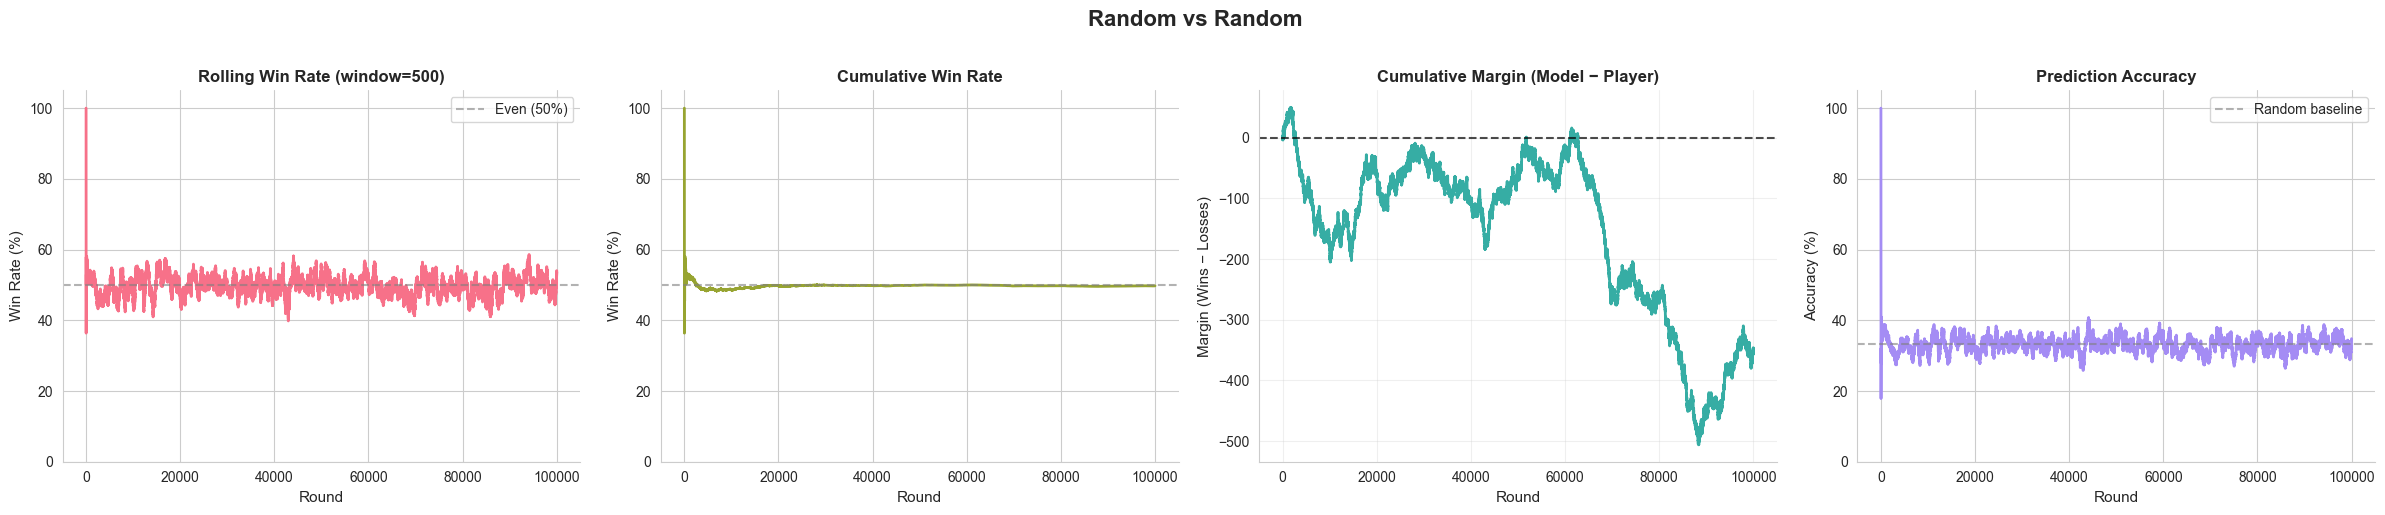


Random vs Random
Total Rounds:  100,000
Wins:          33,149 (33.15% of all games)
Losses:        33,499 (33.50% of all games)
Ties:          33,352 (33.35% of all games)
Decisive Games: 66,648
Win Rate (W/W+L): 49.74%
Final Margin:  -350
Final Prediction Accuracy: 34.40%



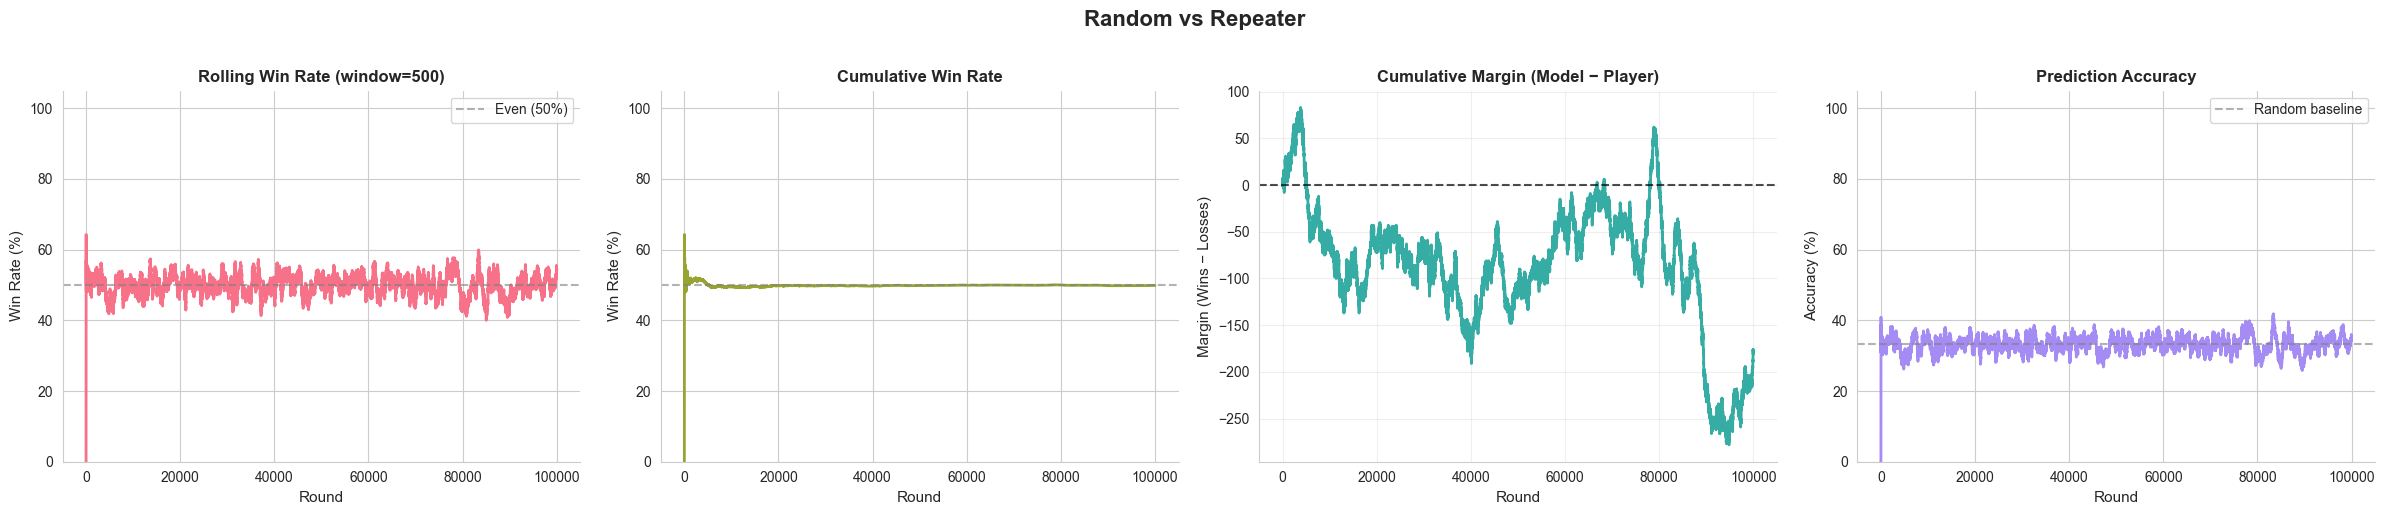


Random vs Repeater
Total Rounds:  100,000
Wins:          33,172 (33.17% of all games)
Losses:        33,352 (33.35% of all games)
Ties:          33,476 (33.48% of all games)
Decisive Games: 66,524
Win Rate (W/W+L): 49.86%
Final Margin:  -180
Final Prediction Accuracy: 35.00%



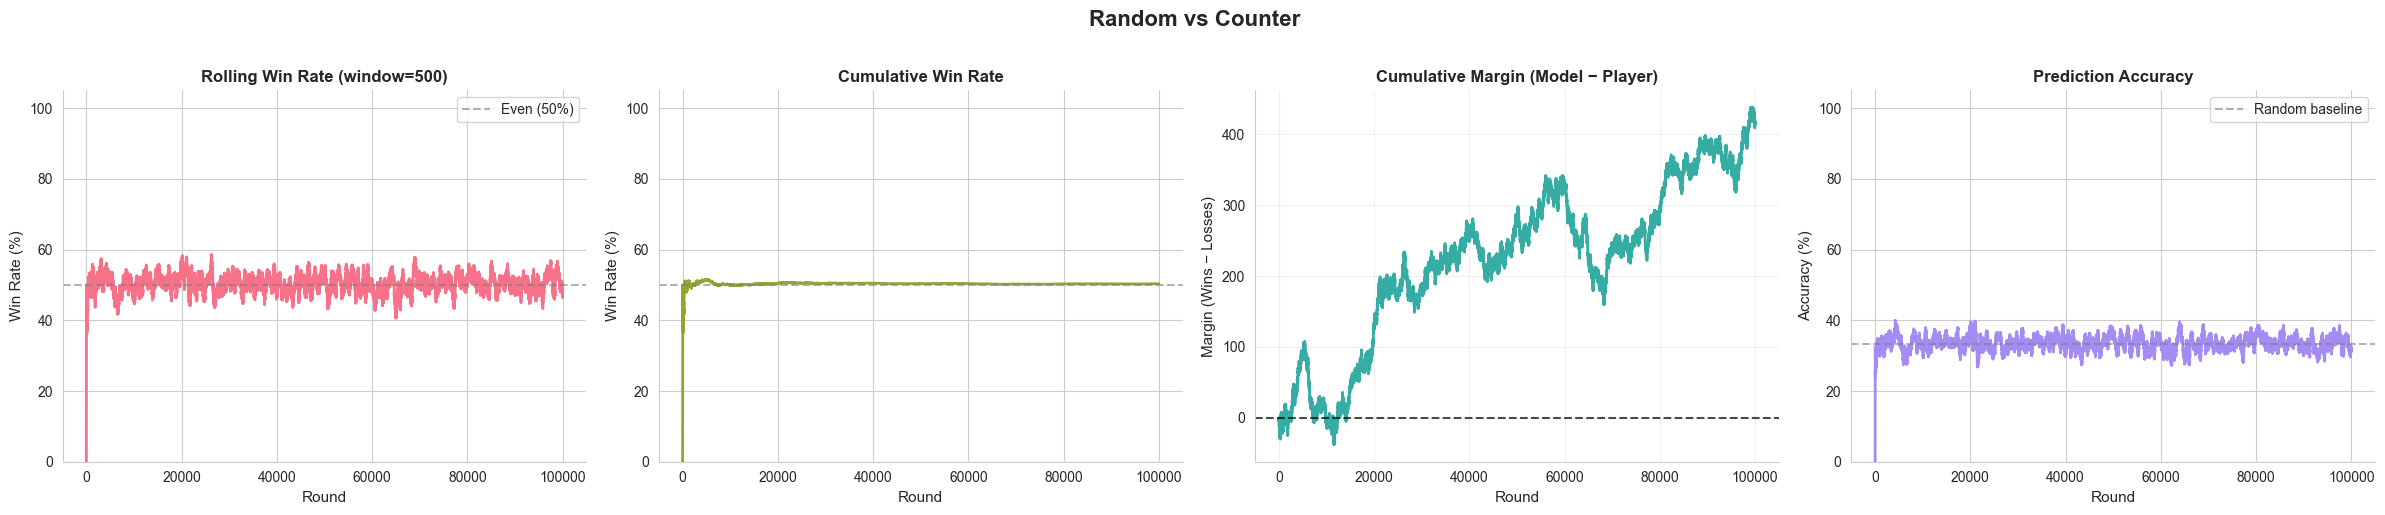


Random vs Counter
Total Rounds:  100,000
Wins:          33,462 (33.46% of all games)
Losses:        33,046 (33.05% of all games)
Ties:          33,492 (33.49% of all games)
Decisive Games: 66,508
Win Rate (W/W+L): 50.31%
Final Margin:  +416
Final Prediction Accuracy: 31.60%



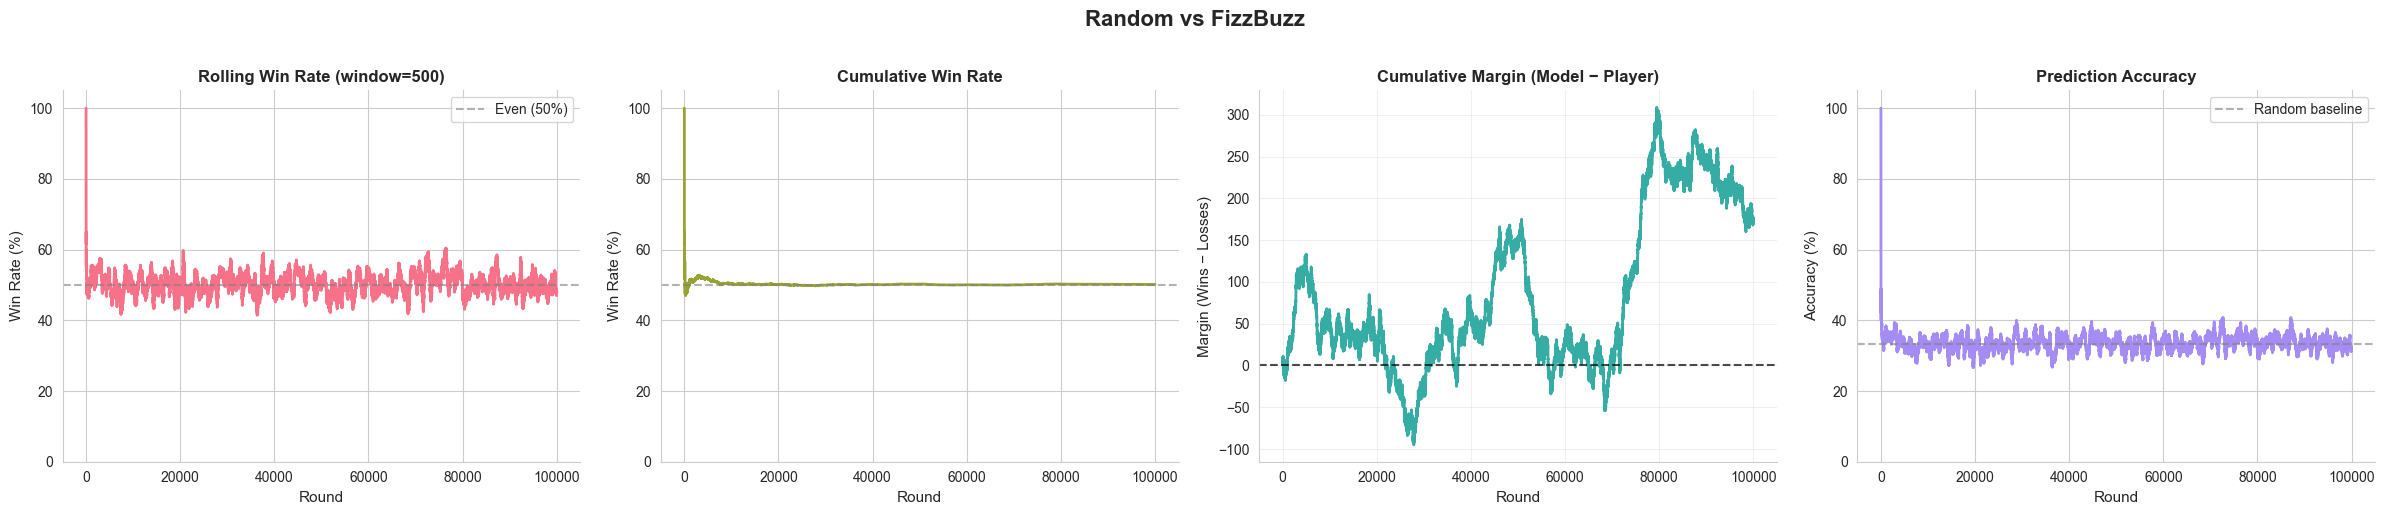


Random vs FizzBuzz
Total Rounds:  100,000
Wins:          33,511 (33.51% of all games)
Losses:        33,341 (33.34% of all games)
Ties:          33,148 (33.15% of all games)
Decisive Games: 66,852
Win Rate (W/W+L): 50.13%
Final Margin:  +170
Final Prediction Accuracy: 32.20%



In [5]:
# RANDOM PREDICTOR
plot_analysis("results/results_random_vs_random.csv", "Random vs Random")
plot_analysis("results/results_random_vs_repeater.csv", "Random vs Repeater")
plot_analysis("results/results_random_vs_counter.csv", "Random vs Counter")
plot_analysis("results/results_random_vs_fizzbuzz.csv", "Random vs FizzBuzz")


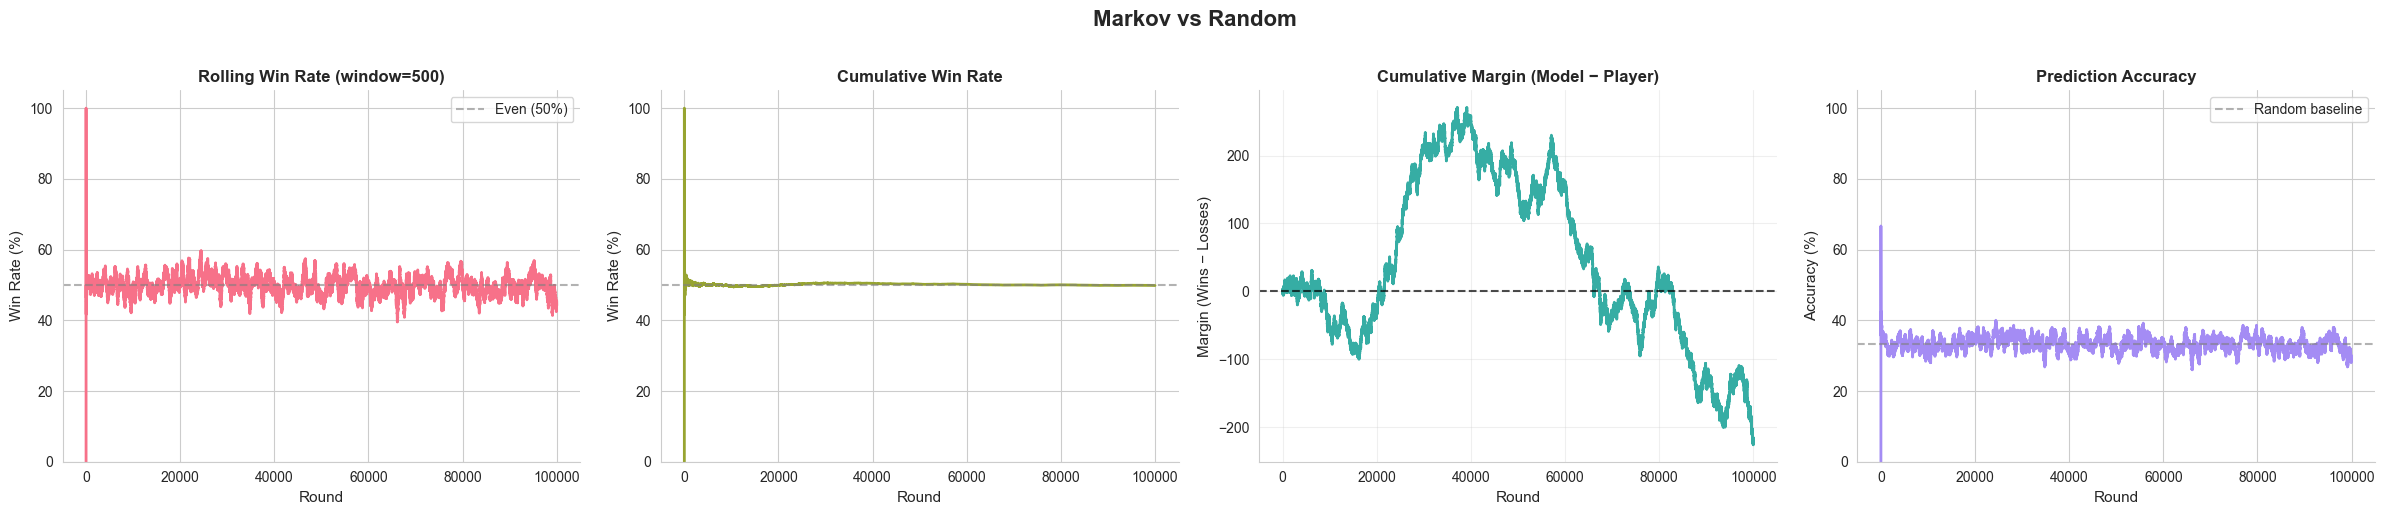


Markov vs Random
Total Rounds:  100,000
Wins:          33,275 (33.27% of all games)
Losses:        33,500 (33.50% of all games)
Ties:          33,225 (33.23% of all games)
Decisive Games: 66,775
Win Rate (W/W+L): 49.83%
Final Margin:  -225
Final Prediction Accuracy: 29.20%



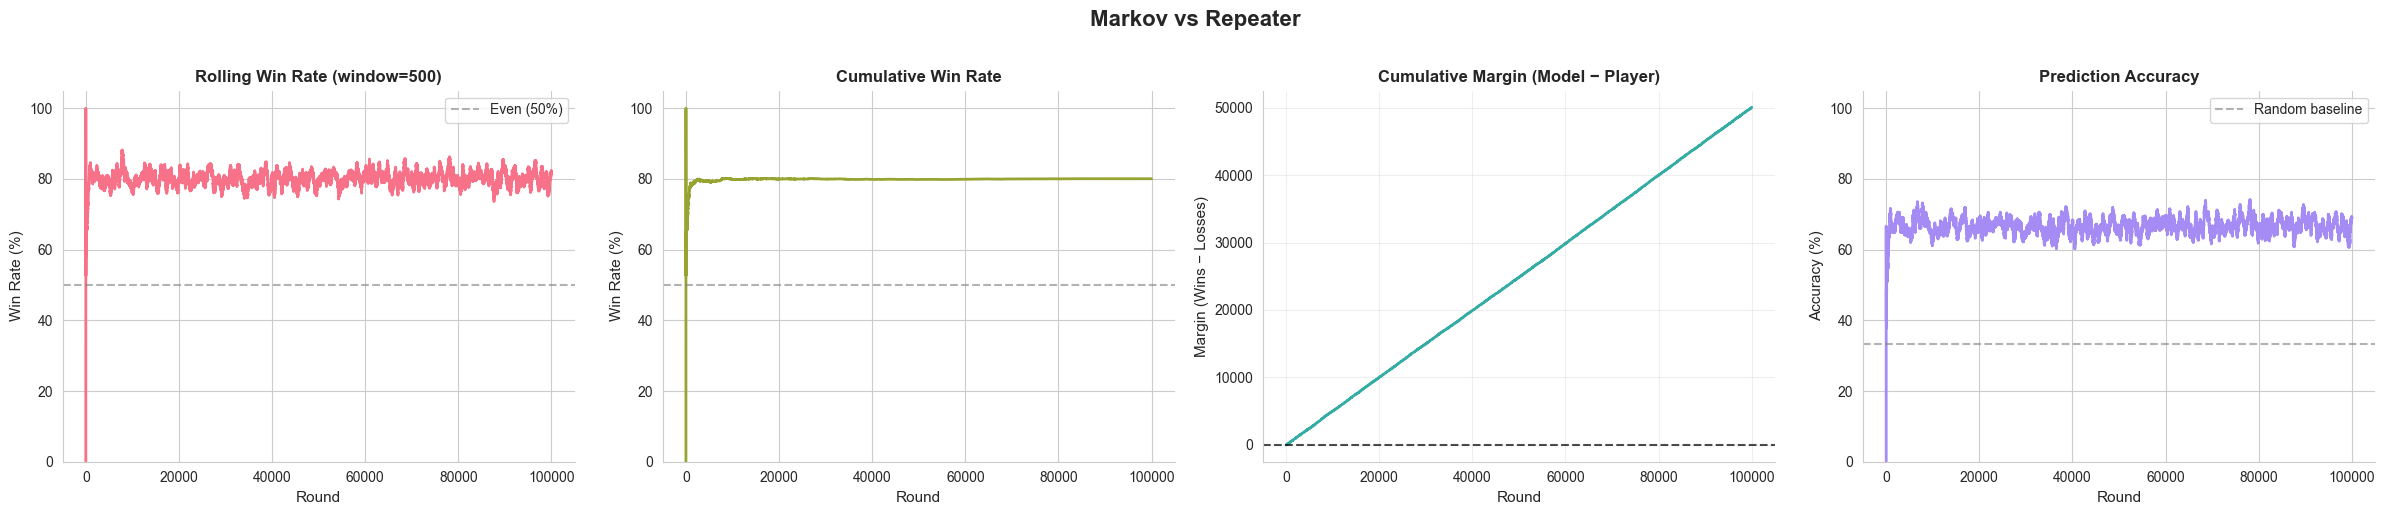


Markov vs Repeater
Total Rounds:  100,000
Wins:          66,639 (66.64% of all games)
Losses:        16,600 (16.60% of all games)
Ties:          16,761 (16.76% of all games)
Decisive Games: 83,239
Win Rate (W/W+L): 80.06%
Final Margin:  +50,039
Final Prediction Accuracy: 69.20%



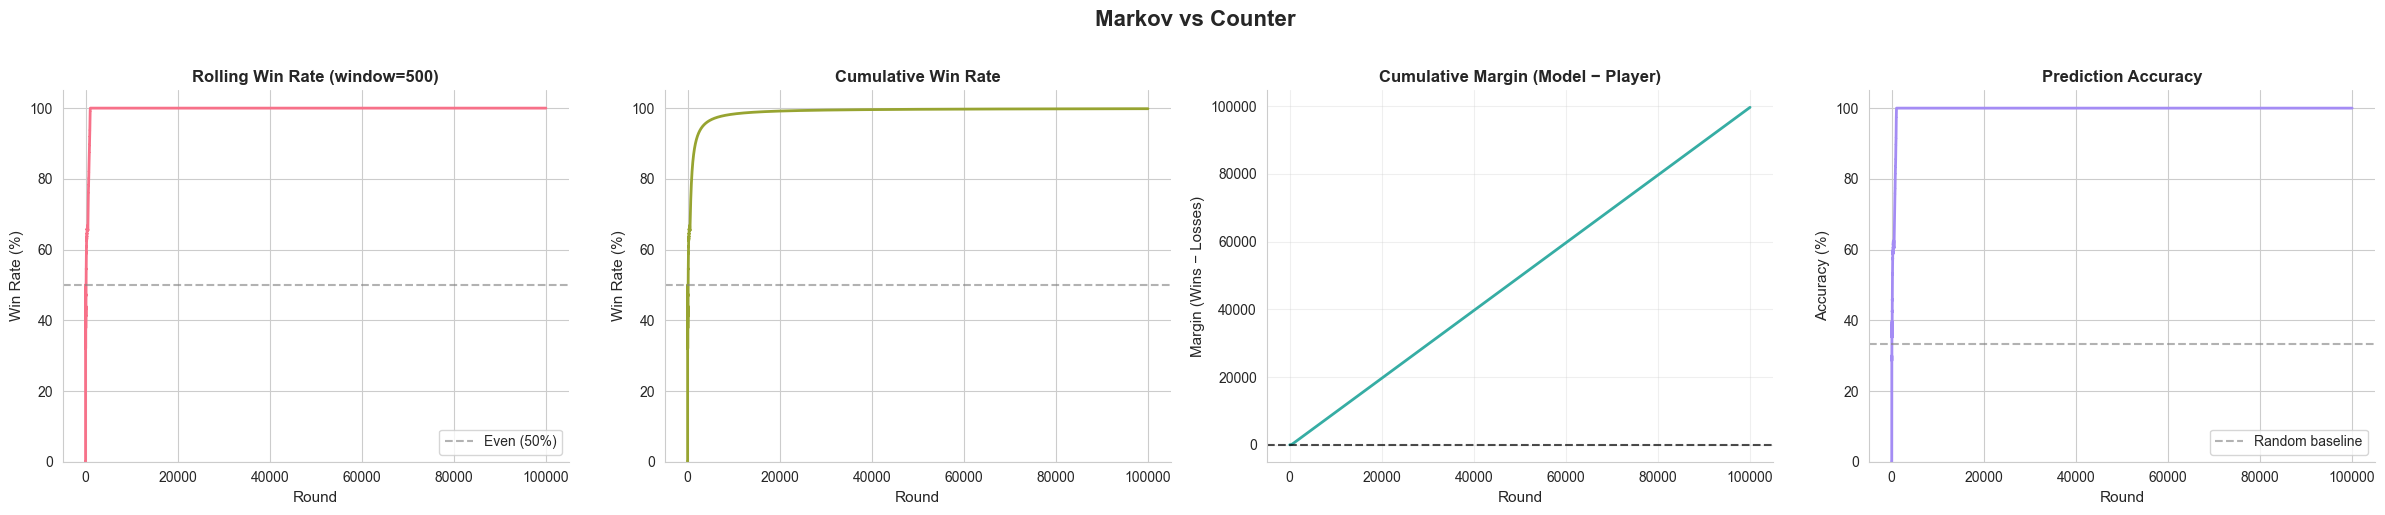


Markov vs Counter
Total Rounds:  100,000
Wins:          99,793 (99.79% of all games)
Losses:        166 ( 0.17% of all games)
Ties:          41 ( 0.04% of all games)
Decisive Games: 99,959
Win Rate (W/W+L): 99.83%
Final Margin:  +99,627
Final Prediction Accuracy: 100.00%



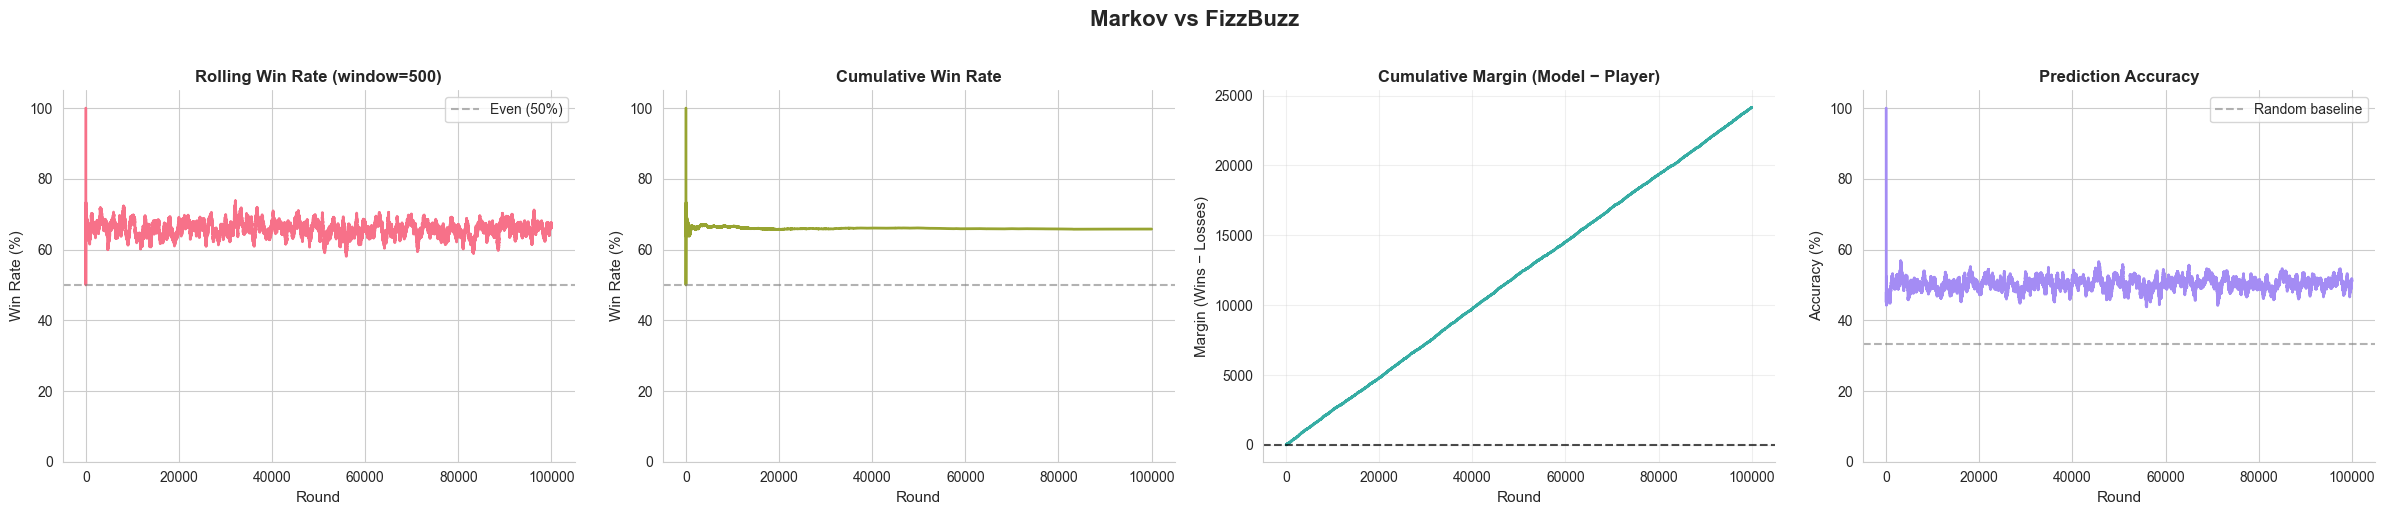


Markov vs FizzBuzz
Total Rounds:  100,000
Wins:          50,313 (50.31% of all games)
Losses:        26,149 (26.15% of all games)
Ties:          23,538 (23.54% of all games)
Decisive Games: 76,462
Win Rate (W/W+L): 65.80%
Final Margin:  +24,164
Final Prediction Accuracy: 51.20%



In [6]:
# MARKOV PREDICTOR
plot_analysis("results/results_markov_vs_random.csv", "Markov vs Random")
plot_analysis("results/results_markov_vs_repeater.csv", "Markov vs Repeater")
plot_analysis("results/results_markov_vs_counter.csv", "Markov vs Counter")
plot_analysis("results/results_markov_vs_fizzbuzz.csv", "Markov vs FizzBuzz")



In [7]:
import seaborn as sns

def plot_early_game(csv_paths, titles, window=100, max_rounds=5000):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))
    
    colors = sns.color_palette("husl", len(csv_paths))
    
    for csv_path, title, color in zip(csv_paths, titles, colors):
        df = pd.read_csv(csv_path).head(max_rounds)
        
        # Calculate win rate excluding ties
        is_win = (df["result"] == "win").astype(int)
        is_loss = (df["result"] == "lose").astype(int)
        is_decisive = is_win + is_loss
        
        df["rolling_win_rate"] = (is_win.rolling(window, min_periods=1).sum() / 
                                  is_decisive.rolling(window, min_periods=1).sum().replace(0, 1)) * 100
        
        plt.plot(df["round"], df["rolling_win_rate"], color=color, linewidth=2.5, label=title)
    
    # Add 50% baseline 
    plt.axhline(50, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, label='Even (50%)')
    
    plt.title(f"Early Learning Comparison (first {max_rounds} rounds, window={window})", fontsize=14, fontweight='bold')
    plt.xlabel("Round", fontsize=12)
    plt.ylabel("Rolling Win Rate (%)", fontsize=12)
    plt.ylim(0, 105)
    plt.legend(loc='lower right', frameon=True, shadow=True)
    sns.despine()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



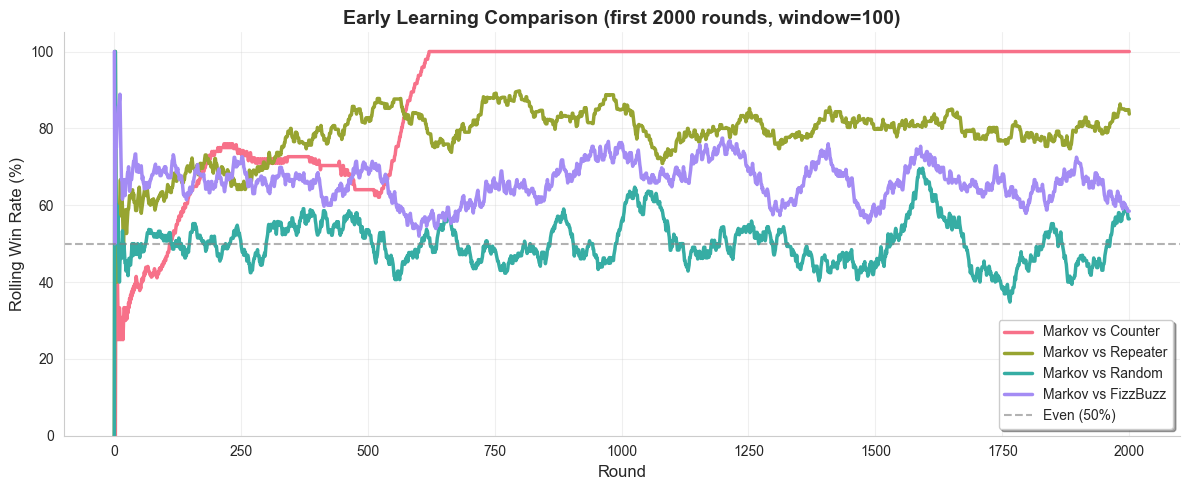

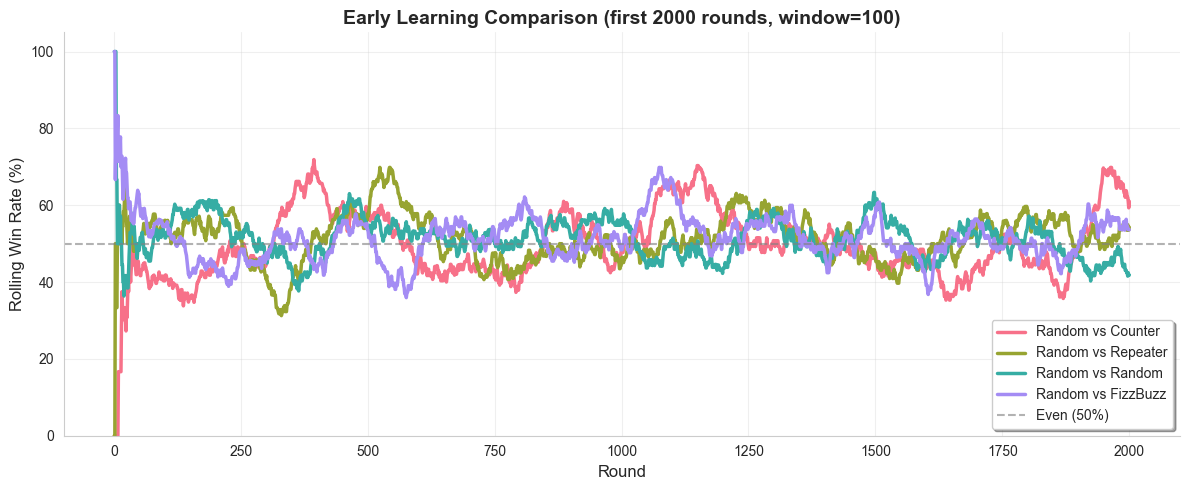

In [8]:
plot_early_game(
    ["results/results_markov_vs_counter.csv", 
     "results/results_markov_vs_repeater.csv", 
     "results/results_markov_vs_random.csv",
     "results/results_markov_vs_fizzbuzz.csv"],
    ["Markov vs Counter", "Markov vs Repeater", "Markov vs Random", "Markov vs FizzBuzz"],
    max_rounds=2000
)

plot_early_game(
    ["results/results_random_vs_counter.csv",
    "results/results_random_vs_repeater.csv",
    "results/results_random_vs_random.csv",
    "results/results_random_vs_fizzbuzz.csv"
    ],
    [
        "Random vs Counter",
        "Random vs Repeater",
        "Random vs Random",
        "Random vs FizzBuzz"
    ],
    max_rounds=2000
)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(csv_paths, labels, title, window=500):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))
    
    colors = sns.color_palette("husl", len(csv_paths))
    
    for csv_path, label, color in zip(csv_paths, labels, colors):
        df = pd.read_csv(csv_path)
        
        is_win = (df["result"] == "win").astype(int)
        is_loss = (df["result"] == "lose").astype(int)
        decisive = is_win + is_loss
        
        df["rolling_win_rate"] = (
            is_win.rolling(window, min_periods=1).sum() / 
            decisive.rolling(window, min_periods=1).sum().replace(0, 1)
        ) * 100
        
        plt.plot(
            df["round"],
            df["rolling_win_rate"],
            label=label,
            linewidth=2.5,
            alpha=0.9,
            color=color
        )
    
    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel("Round", fontsize=12)
    plt.ylabel("Rolling Win Rate (%)", fontsize=12)
    plt.ylim(0, 100)
    plt.legend(loc='best', frameon=True)
    plt.grid(alpha=0.25)
    sns.despine()
    plt.tight_layout()
    plt.show()


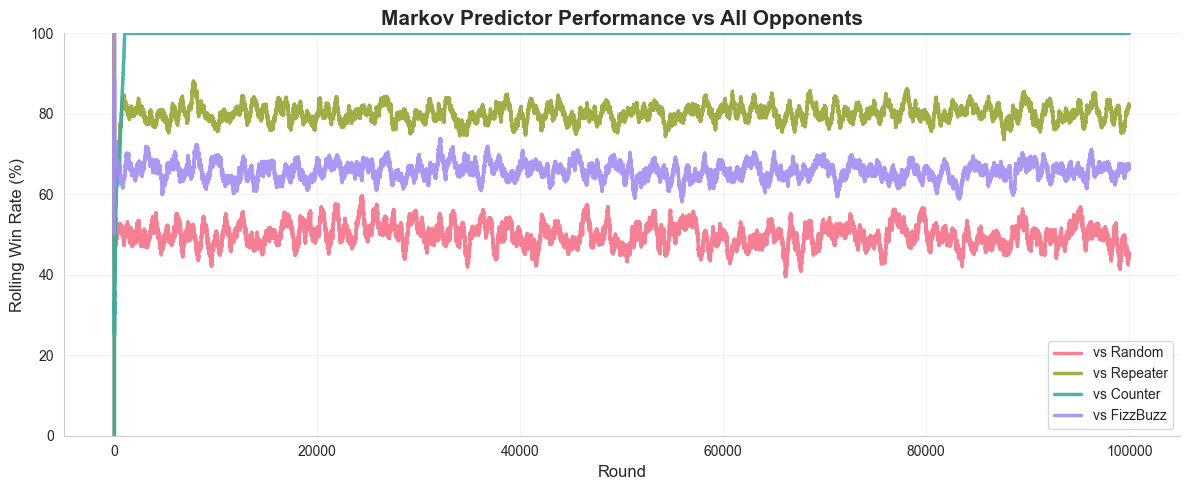

In [10]:
plot_comparison(
    ["results/results_markov_vs_random.csv", 
     "results/results_markov_vs_repeater.csv", 
     "results/results_markov_vs_counter.csv",
     "results/results_markov_vs_fizzbuzz.csv"],
    ["vs Random", "vs Repeater", "vs Counter", "vs FizzBuzz"
     ],
    title="Markov Predictor Performance vs All Opponents"
)


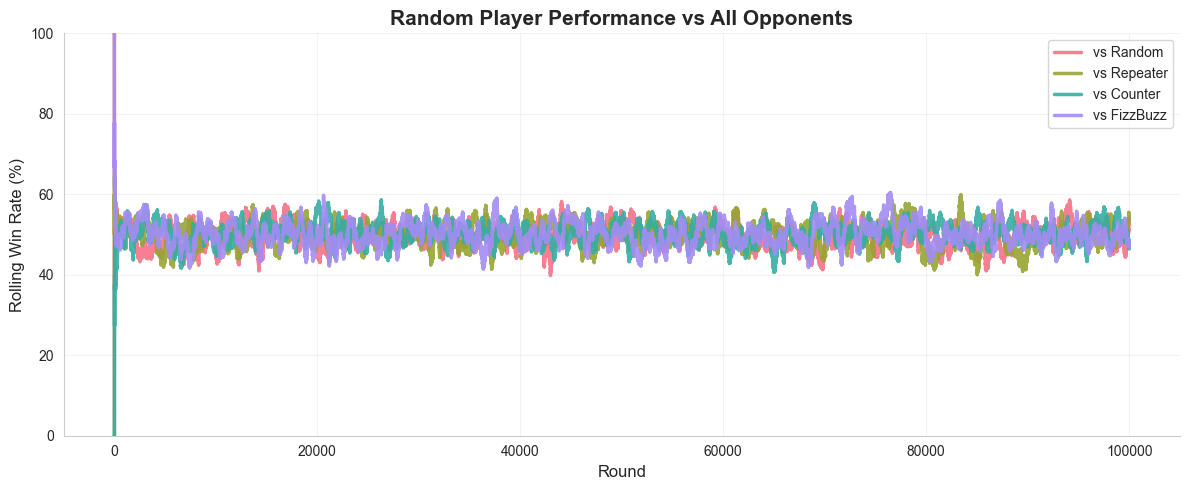

In [11]:
plot_comparison(
    ["results/results_random_vs_random.csv", 
     "results/results_random_vs_repeater.csv", 
     "results/results_random_vs_counter.csv",
     "results/results_random_vs_fizzbuzz.csv"],
    ["vs Random", "vs Repeater", "vs Counter", "vs FizzBuzz"],
    title="Random Player Performance vs All Opponents"
)

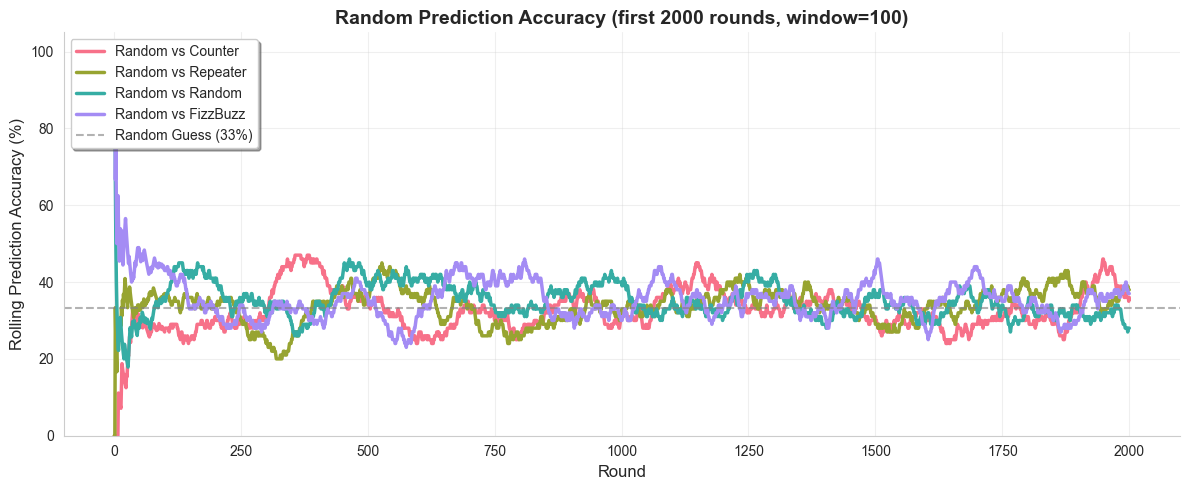

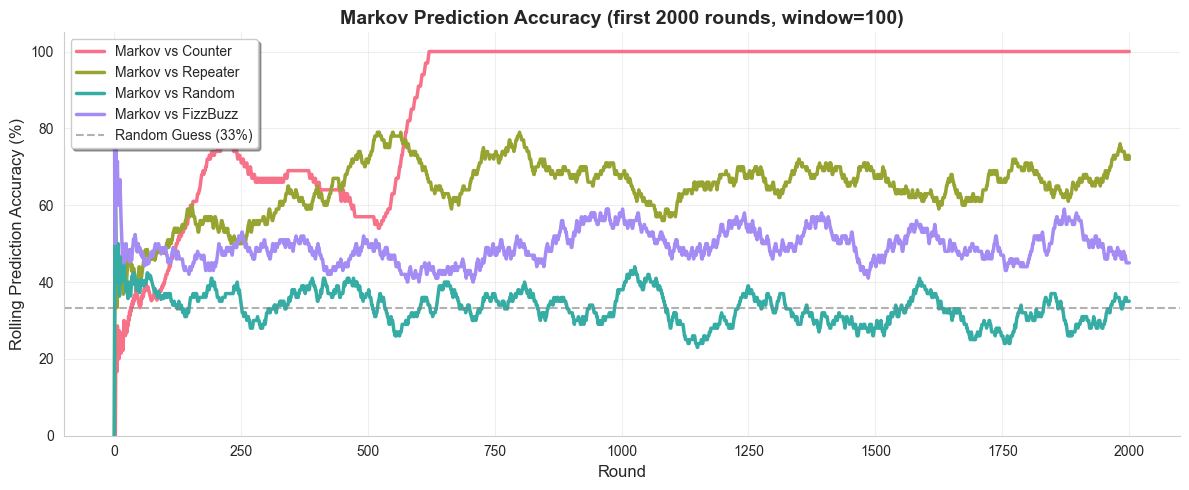

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_random_prediction_accuracy(csv_paths, titles, window=100, max_rounds=5000):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))
    
    colors = sns.color_palette("husl", len(csv_paths))
    
    for csv_path, title, color in zip(csv_paths, titles, colors):
        df = pd.read_csv(csv_path).head(max_rounds)
        
        # Calculate accuracy
        if 'model_prediction' in df.columns and df['model_prediction'].notna().any():
            pred_df = df[df['model_prediction'].notna()].copy()
            pred_df['correct'] = (pred_df['model_prediction'] == pred_df['opponent_move']).astype(int)
        else:
            pred_df = df.copy()
            pred_df['correct'] = (pred_df['model_move'] == pred_df['opponent_move']).astype(int)
        
        pred_df['rolling_accuracy'] = pred_df['correct'].rolling(window, min_periods=1).mean() * 100
        
        plt.plot(pred_df["round"], pred_df["rolling_accuracy"], 
                color=color, linewidth=2.5, label=title)
    
    # Add 33% baseline
    plt.axhline(33.33, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, 
               label='Random Guess (33%)')
    
    plt.title(f"Random Prediction Accuracy (first {max_rounds} rounds, window={window})", 
             fontsize=14, fontweight='bold')
    plt.xlabel("Round", fontsize=12)
    plt.ylabel("Rolling Prediction Accuracy (%)", fontsize=12)
    plt.ylim(0, 105)
    plt.legend(loc='upper left', frameon=True, shadow=True)
    sns.despine()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_markov_prediction_accuracy(csv_paths, titles, window=100, max_rounds=5000):

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))
    
    colors = sns.color_palette("husl", len(csv_paths))
    
    for csv_path, title, color in zip(csv_paths, titles, colors):
        df = pd.read_csv(csv_path).head(max_rounds)
        
        # Calculate accuracy
        if 'model_prediction' in df.columns and df['model_prediction'].notna().any():
            pred_df = df[df['model_prediction'].notna()].copy()
            pred_df['correct'] = (pred_df['model_prediction'] == pred_df['opponent_move']).astype(int)
        else:
            pred_df = df.copy()
            pred_df['correct'] = (pred_df['model_move'] == pred_df['opponent_move']).astype(int)
        
        pred_df['rolling_accuracy'] = pred_df['correct'].rolling(window, min_periods=1).mean() * 100
        
        plt.plot(pred_df["round"], pred_df["rolling_accuracy"], 
                color=color, linewidth=2.5, label=title)
    
    # Add 33% baseline
    plt.axhline(33.33, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, 
               label='Random Guess (33%)')
    
    plt.title(f"Markov Prediction Accuracy (first {max_rounds} rounds, window={window})", 
             fontsize=14, fontweight='bold')
    plt.xlabel("Round", fontsize=12)
    plt.ylabel("Rolling Prediction Accuracy (%)", fontsize=12)
    plt.ylim(0, 105)
    plt.legend(loc='upper left', frameon=True, shadow=True)
    sns.despine()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Example usage
if __name__ == "__main__":
    # Random AI prediction accuracy
    random_csv_paths = [
        "results/results_random_vs_counter.csv",
        "results/results_random_vs_repeater.csv",
        "results/results_random_vs_random.csv",
        "results/results_random_vs_fizzbuzz.csv"
    ]
    
    random_titles = [
        "Random vs Counter",
        "Random vs Repeater",
        "Random vs Random",
        "Random vs FizzBuzz"
    ]
    
    plot_random_prediction_accuracy(random_csv_paths, random_titles, window=100, max_rounds=2000)
    
    # Markov AI prediction accuracy
    markov_csv_paths = [
        "results/results_markov_vs_counter.csv",
        "results/results_markov_vs_repeater.csv",
        "results/results_markov_vs_random.csv",
        "results/results_markov_vs_fizzbuzz.csv"
    ]
    
    markov_titles = [
        "Markov vs Counter",
        "Markov vs Repeater",
        "Markov vs Random",
        "Markov vs FizzBuzz"
    ]
    
    plot_markov_prediction_accuracy(markov_csv_paths, markov_titles, window=100, max_rounds=2000)

MARKOV VS MARKOV RESULTS
Total Rounds:     100000
Model A wins:     0
Model B wins:     0
Ties:             100000
Model A win rate: 0.0%

Prediction Accuracy: 0.0%


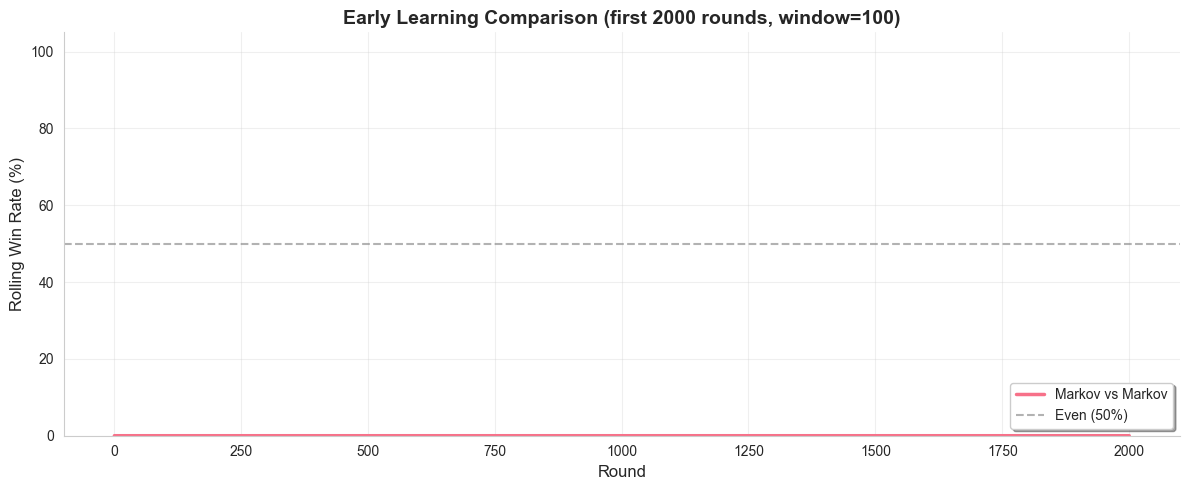

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Markov vs Markov data
df = pd.read_csv('results/results_markov_vs_markov.csv')

# Quick stats
print("="*50)
print("MARKOV VS MARKOV RESULTS")
print("="*50)

total_rounds = len(df)
wins = (df['result'] == 'win').sum()
losses = (df['result'] == 'lose').sum()
ties = (df['result'] == 'tie').sum()

total_decisive = wins + losses
win_rate = (wins / total_decisive * 100) if total_decisive > 0 else 0

print(f"Total Rounds:     {total_rounds}")
print(f"Model A wins:     {wins}")
print(f"Model B wins:     {losses}")
print(f"Ties:             {ties}")
print(f"Model A win rate: {win_rate:.1f}%")
print()

# Check prediction accuracy
if 'model_prediction' in df.columns:
    correct = (df['model_prediction'] == df['opponent_move']).sum()
    total_predictions = df['model_prediction'].notna().sum()
    accuracy = (correct / total_predictions * 100) if total_predictions > 0 else 0
    print(f"Prediction Accuracy: {accuracy:.1f}%")

print("="*50)

# Plot using your existing function
plot_early_game(
    csv_paths=['results/results_markov_vs_markov.csv'],
    titles=['Markov vs Markov'],
    window=100,
    max_rounds=2000
)

In [17]:
import pandas as pd

df = pd.read_csv('results/results_markov_vs_markov.csv')

# Check if ALL moves are identical
identical_moves = (df['model_move'] == df['opponent_move']).sum()
total_rounds = len(df)

print(f"Identical moves: {identical_moves} / {total_rounds} ({identical_moves/total_rounds*100:.1f}%)")

# Show first 50 rounds
print("\nFirst 50 rounds:")
print(df[['round', 'model_move', 'opponent_move', 'result']].head(50))

Identical moves: 100000 / 100000 (100.0%)

First 50 rounds:
    round model_move opponent_move result
0       1          P             P    tie
1       2          S             S    tie
2       3          S             S    tie
3       4          R             R    tie
4       5          R             R    tie
5       6          P             P    tie
6       7          P             P    tie
7       8          S             S    tie
8       9          S             S    tie
9      10          R             R    tie
10     11          R             R    tie
11     12          P             P    tie
12     13          P             P    tie
13     14          S             S    tie
14     15          S             S    tie
15     16          P             P    tie
16     17          S             S    tie
17     18          R             R    tie
18     19          R             R    tie
19     20          S             S    tie
20     21          R             R    tie
21     22       

In [26]:
from src.players.markov_player import MarkovPlayer
from src.predictors.markov_predictor import *

def markov_vs_markov_simulation(rounds=100000, order_a=3, order_b=4):
    player_a = MarkovPlayer(order=order_a)
    player_b = MarkovPlayer(order=order_b)
    
    results = []
    
    for round_num in range(1, rounds + 1):
        move_a = player_a.get_move()
        move_b = player_b.get_move()
        
        # Determine result (from A's perspective)
        if move_a == move_b:
            result = 'tie'
        elif (move_a == 'R' and move_b == 'S') or \
             (move_a == 'P' and move_b == 'R') or \
             (move_a == 'S' and move_b == 'P'):
            result = 'win'
        else:
            result = 'lose'
        
        results.append({
            'round': round_num,
            'model_move': move_a,
            'opponent_move': move_b,
            'result': result
        })
        
        player_a.observe(move_b)
        player_b.observe(move_a)
    
    return pd.DataFrame(results)

# Run it
df = markov_vs_markov_simulation(rounds=100000, order_a=3, order_b=4)

# Check results
print(f"Identical moves: {(df['model_move'] == df['opponent_move']).sum()}")
print(f"Win rate: {(df['result'] == 'win').sum() / len(df) * 100:.1f}%")
print(f"Tie rate: {(df['result'] == 'tie').sum() / len(df) * 100:.1f}%")

Identical moves: 24647
Win rate: 35.7%
Tie rate: 24.6%


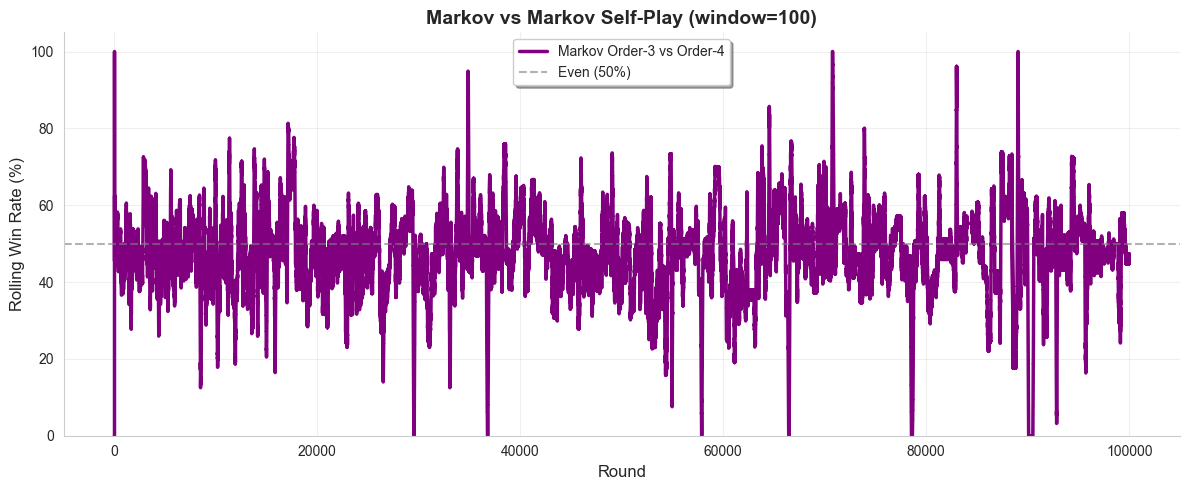


FINAL STATISTICS
Total Rounds:        100000
Order-3 Wins:        35654
Order-4 Wins:        39699
Ties:                24647
Order-3 Win Rate:    45.5%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# You already have the df from the simulation
# df = markov_vs_markov_simulation(rounds=10000, order_a=3, order_b=4)

# Calculate rolling win rate
window = 1000

is_win = (df["result"] == "win").astype(int)
is_loss = (df["result"] == "lose").astype(int)
is_decisive = is_win + is_loss

df["rolling_win_rate"] = (is_win.rolling(window, min_periods=1).sum() / 
                          is_decisive.rolling(window, min_periods=1).sum().replace(0, 1)) * 100

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

plt.plot(df["round"], df["rolling_win_rate"], linewidth=2.5, label="Markov Order-3 vs Order-4", color='purple')
plt.axhline(50, color='gray', linestyle='--', alpha=0.6, linewidth=1.5, label='Even (50%)')

plt.title(f"Markov vs Markov Self-Play (window={window})", fontsize=14, fontweight='bold')
plt.xlabel("Round", fontsize=12)
plt.ylabel("Rolling Win Rate (%)", fontsize=12)
plt.ylim(0, 105)
plt.legend(loc='best', frameon=True, shadow=True)
sns.despine()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print final stats
print("\n" + "="*50)
print("FINAL STATISTICS")
print("="*50)
print(f"Total Rounds:        {len(df)}")
print(f"Order-3 Wins:        {is_win.sum()}")
print(f"Order-4 Wins:        {is_loss.sum()}")
print(f"Ties:                {(df['result'] == 'tie').sum()}")
print(f"Order-3 Win Rate:    {df['rolling_win_rate'].iloc[-1]:.1f}%")
print("="*50)